<a href="https://colab.research.google.com/github/TetaliVarshitha/WiseML/blob/main/RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Library Declaration:**

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn
import warnings
warnings.filterwarnings('ignore', category = RuntimeWarning)
warnings.filterwarnings('ignore', category = UserWarning)

# Importing Normalisation library
from sklearn.preprocessing import MinMaxScaler

# Importing Keras libraries and Packages
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout

# Importing Metrics libraries
import math
from sklearn.metrics import mean_squared_error

# Importing TPU Setup Libraries
# tf.enable_eager_execution()
# from keras.backend import clear_session


**TPU Setup:**

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Reading Data:**

In [4]:
data_train = pd.read_csv('/content/drive/MyDrive/Machine Learning/food_train.csv')

**Data Pre-processing:**

In [5]:
data_train.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,1379560,1,55,1885,136.83,152.29,0,0,177
1,1466964,1,55,1993,136.83,135.83,0,0,270
2,1346989,1,55,2539,134.86,135.86,0,0,189
3,1338232,1,55,2139,339.50,437.53,0,0,54
4,1448490,1,55,2631,243.50,242.50,0,0,40


In [6]:
training_set = data_train.iloc[:, 1:2].values
training_set

array([[  1],
       [  1],
       [  1],
       ...,
       [145],
       [145],
       [145]])

**Feature Scaling:**

In [7]:
sc = MinMaxScaler(feature_range= (0,1))

In [8]:
scaled_training_set = sc.fit_transform(training_set)
scaled_training_set

array([[0.],
       [0.],
       [0.],
       ...,
       [1.],
       [1.],
       [1.]])

**Creating Datastructure with 60 timesteps and 1 output:**

In [9]:
# Using Pandas and Slicing
x_train, y_train = zip(*[(scaled_training_set[i-60:i, 0]
                          ,scaled_training_set[i, 0])
                          for i in range(60, 1258)])

In [10]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [11]:
x_train.shape[1]

60

**Reshaping:**

In [12]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

**Setting Model Parameters:**

In [13]:
INPUT_SHAPE = (x_train.shape[1], 1)
BATCH_SIZE = 32

**Model Creation:**

In [14]:
# Step 1 - Initialising the RNN
rnn_regressor = Sequential()

In [16]:
# Step 2 - First LSTM and Droput Layer
rnn_regressor.add(LSTM(units = 50, return_sequences = True, input_shape = INPUT_SHAPE))
rnn_regressor.add(Dropout(0.2))

In [17]:
# Step 3 - Additional LSTM and Dropout Layers
rnn_regressor.add(LSTM(units = 50, return_sequences = True))
rnn_regressor.add(Dropout(0.2))

rnn_regressor.add(LSTM(units = 75, return_sequences = True))
rnn_regressor.add(Dropout(0.2))

rnn_regressor.add(LSTM(units = 100, return_sequences = True))
rnn_regressor.add(Dropout(0.2))

rnn_regressor.add(LSTM(units = 100))
rnn_regressor.add(Dropout(0.2))

In [18]:
# Step 4 - Full Connection
rnn_regressor.add(Dense(units = 1))

In [19]:
# Compiling the RNN
rnn_regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [20]:
# Summary of RNN model
rnn_regressor.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 60, 50)            10400     
_________________________________________________________________
dropout (Dropout)            (None, 60, 50)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 60, 50)            20200     
_________________________________________________________________
dropout_1 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 60, 50)            20200     
_________________________________________________________________
dropout_2 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 60, 75)            3

**Train the RNN Model:**

In [21]:
EPOCHS = 100
history = rnn_regressor.fit(
    x = x_train,
    y = y_train,
    epochs = EPOCHS,
    batch_size = BATCH_SIZE
)

Epoch 1/100
38/38 [==============================] - 38s 23ms/step - loss: 0.0000e+00
Epoch 2/100
38/38 [==============================] - 1s 18ms/step - loss: 0.0000e+00
Epoch 3/100
38/38 [==============================] - 1s 18ms/step - loss: 0.0000e+00
Epoch 4/100
38/38 [==============================] - 1s 17ms/step - loss: 0.0000e+00
Epoch 5/100
38/38 [==============================] - 1s 18ms/step - loss: 0.0000e+00
Epoch 6/100
38/38 [==============================] - 1s 18ms/step - loss: 0.0000e+00
Epoch 7/100
38/38 [==============================] - 1s 18ms/step - loss: 0.0000e+00
Epoch 8/100
38/38 [==============================] - 1s 18ms/step - loss: 0.0000e+00
Epoch 9/100
38/38 [==============================] - 1s 18ms/step - loss: 0.0000e+00
Epoch 10/100
38/38 [==============================] - 1s 18ms/step - loss: 0.0000e+00
Epoch 11/100
38/38 [==============================] - 1s 18ms/step - loss: 0.0000e+00
Epoch 12/100
38/38 [==============================] - 1s 19ms/

**Prediction and Visualising the Result:**

In [22]:
data_test = pd.read_csv('/content/drive/MyDrive/Machine Learning/food_test.csv')

In [23]:
# Real stock Price
real_stock_price = data_test.iloc[:, 1:2].values

In [24]:
real_stock_price

array([[146],
       [146],
       [146],
       ...,
       [155],
       [155],
       [155]])

In [56]:
# Predicting Stock Price of Jan 2017
data_total = pd.concat((data_train['checkout_price'], data_test['checkout_price']), axis = 0)
inputs = data_total[len(data_total) - len(data_test) - 60:].values  # values for making this a numpy array

# Reshaping
inputs = inputs.reshape(-1,1)

In [57]:
# Scaling
inputs = sc.transform(inputs) # transform must be used instead of fit_transform to apply the same tranformation which occured in the training set 

In [58]:
# Creating Datastructure with 60 timesteps for test data
x_test = [inputs[i-60:i, 0] for i in range(60, 80)]    # For 20 Financial days
x_test = np.array(x_test)

In [59]:
# Reshaping
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

**Prediction of Test Data with Trained RNN:**

In [60]:
predicted_stock_price = rnn_regressor.predict(x_test)

In [61]:
# Inversing the scaled data to original
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

In [62]:
predicted_stock_price

array([[-1.01683  ],
       [-1.053043 ],
       [-1.0957395],
       [-1.1451651],
       [-1.2002349],
       [-1.2590954],
       [-1.3174753],
       [-1.3738918],
       [-1.4249206],
       [-1.4653893],
       [-1.4931512],
       [-1.5088705],
       [-1.5074246],
       [-1.4893765],
       [-1.456156 ],
       [-1.4106199],
       [-1.3573675],
       [-1.301926 ],
       [-1.2462635],
       [-1.1930233]], dtype=float32)

**Visualisation:**

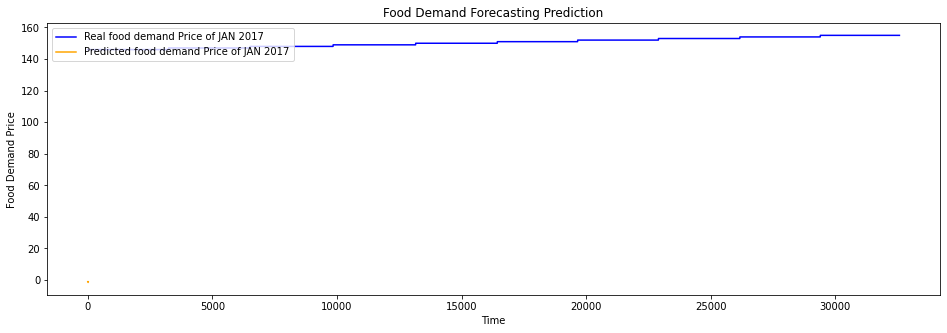

In [63]:
plt.figure(figsize=(16, 5))
plt.plot(real_stock_price, color = 'blue', label = 'Real food demand Price of JAN 2017')
plt.plot(predicted_stock_price, color = 'orange', label = 'Predicted food demand Price of JAN 2017')
plt.title('Food Demand Forecasting Prediction')
plt.xlabel('Time')
plt.ylabel('Food Demand Price')
plt.legend(loc='upper left')
plt.show()

**Performance Evaluation:**

In [64]:
rmse = math.sqrt(mean_squared_error(real_stock_price, predicted_stock_price))
print('Root Mean Squared Error of our RNN model: {}'.format(rmse))

ValueError: ignored